This project is devoted to 
# Genetic analysis of ancient Belarusian flax varieties to identify forms with high genome plasticity
It was created to perform statistics (dispersion, and cluster analysis) and visualisation (compare groups of varieties by morphological characteristics of flower and stem with venn diagramms) as part of manuscript preparation. The planned conference is "Current environmental issues-2023", Hrodno. 

Linum Insertion Sequence (LIS-1) occurs in the plastic genome of flax in response to special conditions of mineral and water nutrition, and can be stably transmitted to offspring. We analyzed 11 ancient Belarusian varieties (112 individual plants) of fiber flax Linum usitatissimum L., var. elongatum. The presence/absence of LIS-1 was checked in individual plants using primer-specific PCR followed by agarose gel electrophoresis. The studied flax varieties were combined into 4 groups depending on the ability to form and retain the LIS-1 insert: 1) non-reacting varieties (group “3”, LIS-1 was not found); 2) reactive unstable ones (group “2”, which formed the insertion and partially lost it); 3) reactive stable, completely lost the insertion (group "0"); 4) reactive stable, retained the insertion LIS-1 (group "1").

The first part of the project is dedicated grounwork and dispersion analysis (Mann-Whitney U Test). Second part includes cluster analysis. In the third part we will compare groups of genotypes by morphological characteristics of flower and stem using Venn diagramms.   

## Part 1. Groundwork. Mann-Whitney U Test.

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering 

### Weather conditions during the wegetation period at 2021 year

In [2]:
# Load file with temperatures and precipitation
weather = pd.read_excel("~/db/21_flax_input1.ods", sheet_name='weather')

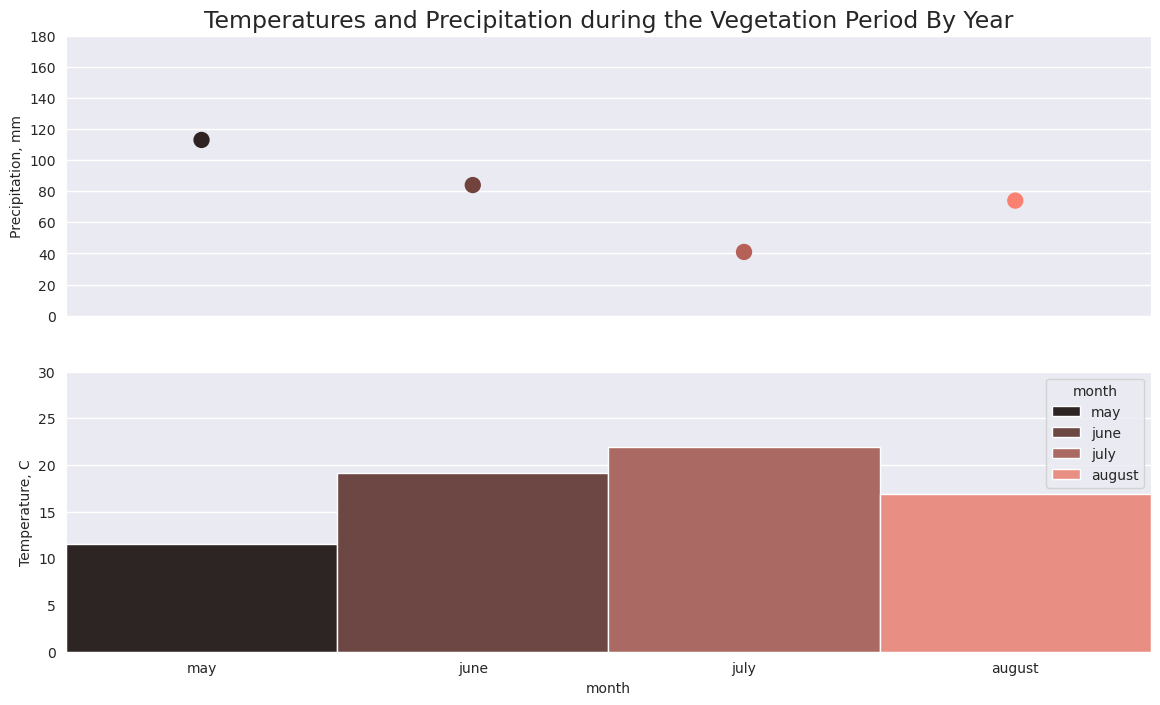

In [3]:
# Precipitation, mm and Temperature, C, in may, june, jully and august. 
plt.rcParams.update({'figure.figsize':(14,8), 'figure.dpi':100})
plt.style.use('Solarize_Light2')
sns.set_style('darkgrid')
pf, axarr = plt.subplots(2, sharex=True)
sns.pointplot(x="month", y="Rain, mm", data=weather, ax=axarr[0], join=True, palette='dark:salmon')
sns.barplot(x="month", y="T_avg", data=weather, ax=axarr[1], hue = 'month', palette='dark:salmon', width=1, dodge=False)
axarr[1].set_ylabel('Temperature, C')
axarr[0].set_ylabel('Precipitation, mm')
# remove duplicated x-axis (check first that it is properly aligned)
axarr[0].set_ylim(0, 180)
axarr[1].set_ylim(0, 30)
#axarr[1].legend(title='month', loc='upper right')
axarr[0].xaxis.set_visible(False)
axarr[0].set_title('Temperatures and Precipitation during the Vegetation Period By Year', fontsize = 17)
plt.show()

In [4]:
# Load database, get info 
df = pd.read_excel("~/db/21_flax_input1.ods", sheet_name='Sheet3')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   landrace            112 non-null    object
 1   number_plant        112 non-null    object
 2   Lis_1               112 non-null    int64 
 3   group_lis           112 non-null    int64 
 4   length_plant        112 non-null    int64 
 5   technical_length    112 non-null    int64 
 6   n_capsula           112 non-null    int64 
 7   n_seeds             112 non-null    int64 
 8   hypo_length         112 non-null    int64 
 9   length_coty_leaves  112 non-null    int64 
 10  hypo_antocyan       112 non-null    object
 11  flower_shape        112 non-null    object
 12  flower_degree_open  112 non-null    object
 13  flower_diameter     112 non-null    object
 14  petal_shape         112 non-null    object
 15  petal_coler         112 non-null    object
 16  wiens_pet_color     112 no

In [5]:
# Drop features that not contribute to dispersion analysis
df_anova = df.drop(['number_plant', 'hypo_antocyan', 'flower_shape', 'flower_degree_open', 'flower_diameter', 'petal_shape', 'petal_coler', 'wiens_pet_color', 'anthers_color', 'leaves'], axis=1)

In [6]:
# Get basic statistics by technical length
print(df_anova.groupby('group_lis').describe().technical_length)

           count       mean       std   min    25%   50%    75%   max
group_lis                                                            
0           13.0  40.615385  5.530800  30.0  39.00  42.0  45.00  47.0
1           55.0  33.836364  8.515267  18.0  27.00  35.0  40.00  50.0
2           24.0  36.541667  5.853124  25.0  33.50  38.0  39.25  48.0
3           20.0  39.300000  5.930297  29.0  35.75  38.0  42.75  50.0


In [7]:
# Increasing the dataset size in 5 times as we have originally only 112 samples
df_anova3 = df_anova.sample(frac=5, replace=True, random_state=1)

In [8]:
# Get equal number of samples (50) for each group by lis1
df_anova4 = df_anova3.groupby('group_lis').sample(n=50, random_state=1)

In [9]:
# Slice dataframe - plants with insertion
df_ins = df_anova4[df_anova4['group_lis'] == 1]

In [10]:
# Slice dataframe - plants with no insertion
df_no_ins = df_anova4[df_anova4['group_lis'] == 0]

In [11]:
# Slice dataframe - plants that form and loose the insertion, unstable
df_pl = df_anova4[df_anova4['group_lis'] == 2]

In [12]:
# Slice dataframe - plants did not for the insrtion at all
df_st = df_anova4[df_anova4['group_lis'] == 3]

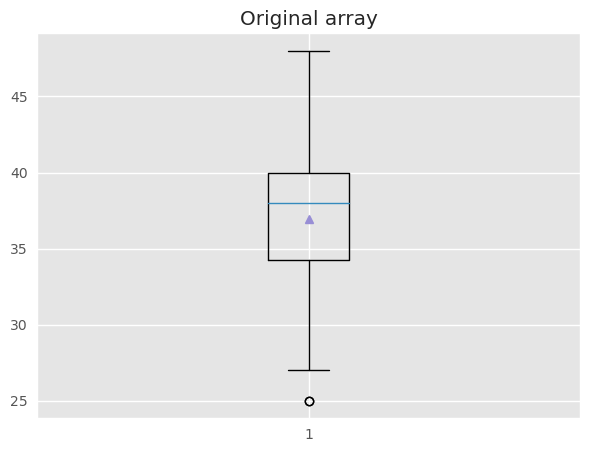

In [13]:
# Vizualize feature 'technical_length' for unstable plants - detection of the outliers
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.style.use('ggplot')
plt.boxplot(df_pl['technical_length'], showmeans= True)
plt.title('Original array')
plt.show()

/tmp/ipykernel_7235/2004835976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pl.iloc[:, 4] = winsorize(df_pl.iloc[:, 4], limits = [0.05, 0.001])


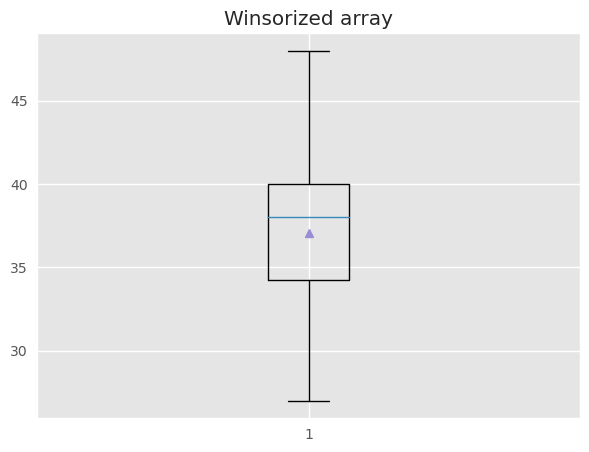

In [14]:
# Handle outliers for plants with insertion
from scipy.stats.mstats import winsorize

df_pl.iloc[:, 4] = winsorize(df_pl.iloc[:, 4], limits = [0.05, 0.001])
plt.boxplot(df_pl.iloc[:, 4], showmeans= True)
plt.title('Winsorized array')
plt.show()

In [15]:
# Perform the Brown-Forsythe Test to check gomoscedasticity (homogeneity of variance)
stats.levene(df_ins['technical_length'],
             df_no_ins['technical_length'],
            center = 'median')

LeveneResult(statistic=13.866004266307398, pvalue=0.0003279696661278223)

In [16]:
# Perform the Brown-Forsythe Test to check gomoscedasticity (homogeneity of variance)
stats.levene(df_ins['technical_length'],
             df_pl['technical_length'],
            center = 'median')

LeveneResult(statistic=15.370218324314232, pvalue=0.00016385001721661756)

In [17]:
# Perform the Brown-Forsythe Test to check gomoscedasticity (homogeneity of variance)
stats.levene(df_pl['technical_length'],
             df_no_ins['technical_length'],
            center = 'median')

LeveneResult(statistic=0.38006410256410167, pvalue=0.5389984088597531)

P-value = 0.000328 and 0.000164 means that test for homogeneity of variance is failed, so we will uply no-parametric methods for analysis of variance (Mann-Whitney U Test). For groups df_st and df_no_is; df_st and df_pl we will use one-way ANOVA as p-value=0.5389984 and p-value=0.68429.

In [18]:
# Extract individual groups by techical length
ins_tl = df_ins.loc[(df_ins['group_lis'] == 1), ['technical_length']]
no_ins_tl = df_no_ins.loc[(df_no_ins['group_lis'] == 0), ['technical_length']]
pl_tl = df_pl.loc[(df_pl['group_lis'] == 2), ['technical_length']]
st_tl = df_st.loc[(df_st['group_lis'] == 3), ['technical_length']]

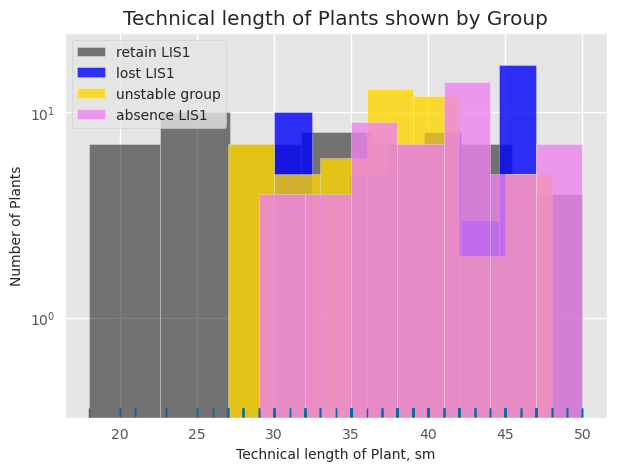

In [19]:
# Figure 8. Distribution of groups of flax varieties by the technical length of the plant.#Solarize_Light2
plt.style.use('tableau-colorblind10')
#plt.style.use('fivethirtyeight')
f,ax = plt.subplots(figsize = (7,5))
sns.histplot(df_ins[df_ins.group_lis == 1].technical_length, ax = ax, label = 'retain LIS1', color = 'black', alpha=.5, edgecolor=(1, 1, 1, .4))
sns.histplot(df_no_ins[df_no_ins.group_lis == 0].technical_length, ax = ax, label = 'lost LIS1', color = 'blue', alpha=.8, edgecolor=(1, 1, 1, .4))
sns.histplot(df_pl[df_pl.group_lis == 2].technical_length, ax = ax, label = 'unstable group', color = 'gold', alpha=.8, edgecolor=(1, 1, 1, .4))   
sns.histplot(df_st[df_st.group_lis == 3].technical_length, ax = ax, label = 'absence LIS1', color = 'violet', alpha=.8, edgecolor=(1, 1, 1, .4))
sns.rugplot(df_anova4, x="technical_length")
plt.title('Technical length of Plants shown by Group') #Number of plants of a certain length shown by category
plt.xlabel('Technical length of Plant, sm')
plt.ylabel('Number of Plants')
ax.set_yscale('log')
plt.legend()
plt.show()

In [20]:
# non-parametric test to compare groups "pl" (2) and no_ins (0)
stats.mannwhitneyu(x=pl_tl, y=no_ins_tl, alternative = 'two-sided')

MannwhitneyuResult(statistic=array([881.5]), pvalue=array([0.01092002]))

In [21]:
# non-parametric test to compare groups ins (1) and no_ins (0)
stats.mannwhitneyu(x=ins_tl, y=no_ins_tl, alternative = 'two-sided')

MannwhitneyuResult(statistic=array([650.]), pvalue=array([3.44512919e-05]))

In [22]:
# non-parametric test to compare groups ins (1) and "pl" (2)
stats.mannwhitneyu(x=ins_tl, y=pl_tl, alternative = 'two-sided')

MannwhitneyuResult(statistic=array([881.5]), pvalue=array([0.01098309]))

In [23]:
# non-parametric test to compare groups ins (1) and stable (3)
stats.mannwhitneyu(x=ins_tl, y=st_tl, alternative = 'two-sided')

MannwhitneyuResult(statistic=array([660.]), pvalue=array([4.61216196e-05]))

In [24]:
# ANOVA run to compare groups no_ins_tl, st_tl
fvalue, pvalue = stats.f_oneway(no_ins_tl, st_tl)
print(fvalue, pvalue)

[0.0110435] [0.91652073]


In [25]:
# ANOVA run to compare groups pl_tl, st_tl
fvalue, pvalue = stats.f_oneway(pl_tl, st_tl)
print(fvalue, pvalue)

[5.93088457] [0.01668522]


In [26]:
# non-parametric test to compare groups no_ins (0) and "pl" (2)
stats.mannwhitneyu(x=no_ins_tl, y=pl_tl, alternative = 'two-sided')

MannwhitneyuResult(statistic=array([1618.5]), pvalue=array([0.01092002]))

The Mann-Whitney test showed a significant difference between all groups (p-value < 0.01), with the exeption for groups "0" and "3" (p-value=0.73701543).

As a result, the group of varieties that formed and retained the insertion LIS1 (group "1") is characterized by a shorter technical plant length than the groups of varieties that formed and lost the insertion (partially or completely: groups "2" and "0"), or did not form the insertion (group "3"). 
This finding is in concordance with the statement, that under normal conditions, the plastic genotypes (that coul form the insertion and lose it) outperforms the stable genotypes with the insertion (Bickel C. et al., 2012). The ability to modify genome in response to growth challenges (form the insertion) could be an advantage. No significant difference between group "0" (formed the insertion and lost it) and group "3" (did not formed the insertion) could be explained as follows: when the insertion occures it affects the insertion site with two genes (he growth inhibitor-1 gene and the cyclin-dependent kinase inhibitor-2 gene) leading to single nucleotide substitutions, insertions and deletions (Bickel C., 2012). Plants with the presence of LIS1 phenotypicaly differes from plants withought the insertion (Bickel C. et al., 2012). So, plants that comleatly lost the insertion and that not formed it at all, could not been significally diferent by techical plant length.

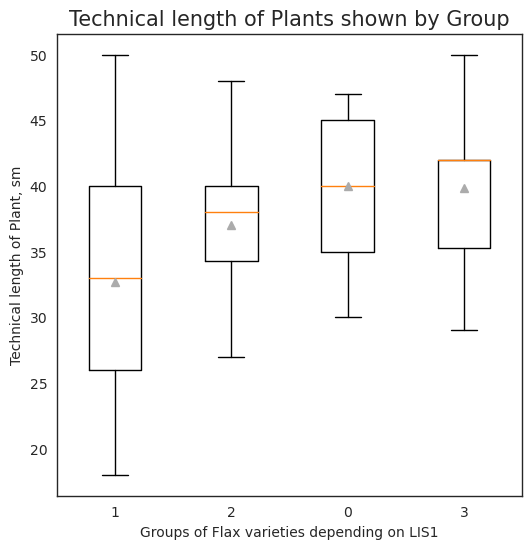

In [27]:
#Figure 9. The distribution of the trait "Techical Plant length" depending on the group #tableau-colorblind10
#sns.set_style('whitegrid')
sns.set_style('white')
plt.style.use('tableau-colorblind10')
fig = plt.figure(figsize= (6, 6))
ax = fig.add_subplot(111)

ax.set_title("Technical length of Plants shown by Group", fontsize= 15)
ax.set

data = [df_ins['technical_length'],
             df_pl['technical_length'],
             df_no_ins['technical_length'],
        df_st['technical_length']
       ]

ax.boxplot(data,
           labels= [1, 2, 0, 3],
           showmeans= True)

plt.xlabel("Groups of Flax varieties depending on LIS1")
plt.ylabel("Technical length of Plant, sm")

plt.show()

## 2. Cluster Analysis

In [28]:
# Get column names of df_anova4
df_anova4.columns

Index(['landrace', 'Lis_1', 'group_lis', 'length_plant', 'technical_length',
       'n_capsula', 'n_seeds', 'hypo_length', 'length_coty_leaves'],
      dtype='object')

In [29]:
# Create input features for analysis
X = df_anova4.drop(['landrace', 'group_lis'], axis=1)

In [30]:
# Standartisation of data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

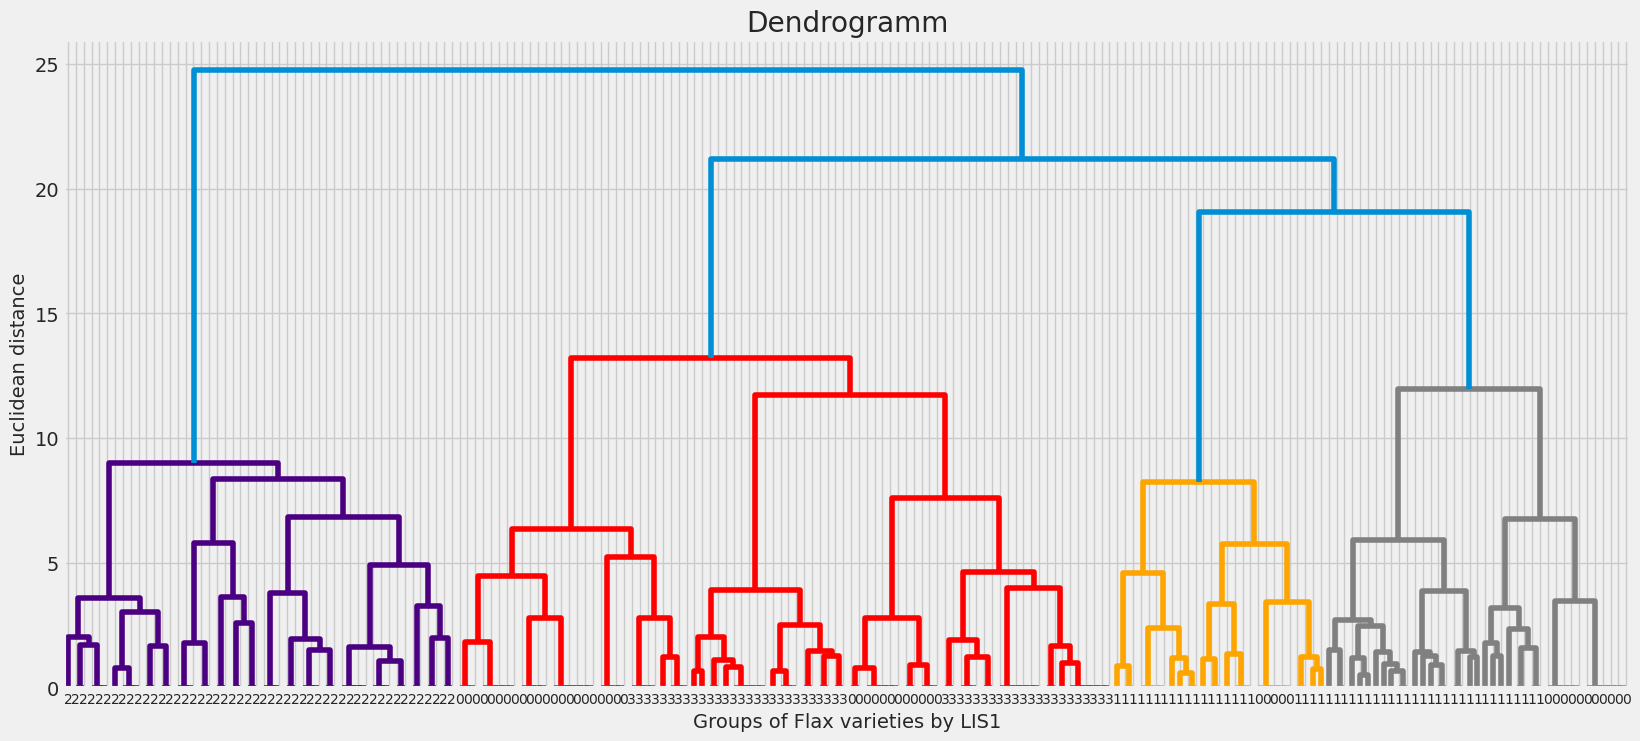

In [31]:
# Create dendrogramm 
sns.set_style('whitegrid')
hc.set_link_color_palette(['indigo', 'red', 'orange', 'gray'])
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':100})
leafs = df_anova4['group_lis'].tolist()
names = df_anova4['landrace'].tolist()

dendrogram = hc.dendrogram(hc.linkage(X_std, method = 'ward'), labels=leafs, 
            show_leaf_counts=False, leaf_font_size = 10)

plt.title('Dendrogramm')
plt.xlabel('Groups of Flax varieties by LIS1')
plt.ylabel('Euclidean distance')
plt.xticks(rotation=0)
plt.show()

On the dendrogramm shown abowe there are two main clusters. One of them is formed by genotypes from group "2" (unstable forms); the second cluster is formed by one subcluster represented group "3" (stable, did not formed LIS1), and and partly group "0" (that formed and lost the insertion); two other subclusters are formed with both genotypes from group "1" (with the insertion LIS1) and the rest genotypes of the group "0".

## 3. Venn Diagrams

Morphological characteristics of flower studied were: shape (open, open-separated), degree of opening (open, campanulate), diameter (small, large, medium), shape of the petals (rounded, elliptical), the surface of the petals (smooth, corrugated), the color of the petals (pale light blue, light blue, purple), the color of the weins of the petals (light blue, purple), the color of the anthers (cream, light blue, blue); Morphological characteristics of stem - foliage (medium, high).Here we use matplotlib_venn module to find shared and individual features between groups (iteratively 4 times by 3 groups). Than we will compare all four groups simultaneously by means of the online tool venny [Oliveros, J.C. (2007-2015) Venny. An interactive tool for comparing lists with Venn's diagrams. https://bioinfogp.cnb.csic.es/tools/venny/index.html] 

In [32]:
# Import modules
from matplotlib_venn import venn3, venn3_circles

In [33]:
# Load database df_fen phenotypes and lis polymorphisms
group3 = pd.read_excel("~/db/21_flax_input1.ods", sheet_name='group_3')
group2 = pd.read_excel("~/db/21_flax_input1.ods", sheet_name='group_2')
group1 = pd.read_excel("~/db/21_flax_input1.ods", sheet_name='group_1')
group0 = pd.read_excel("~/db/21_flax_input1.ods", sheet_name='group_0')

In [34]:
# Convert to list characteristics of plants
group_0 = group0['Group_0'].to_list()
group_1 = group1['Group_1'].to_list()
group_2 = group2['Group_2'].to_list()
group_3 = group3['Group_3'].to_list()

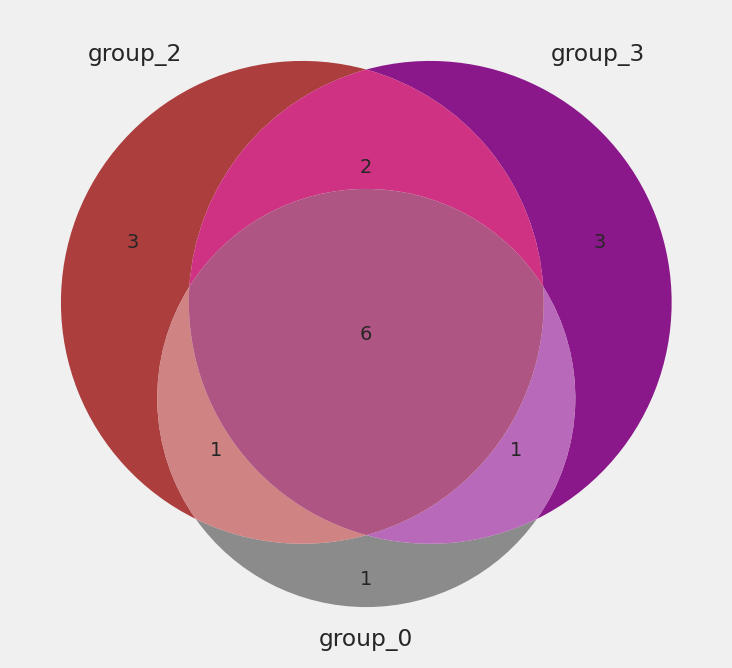

In [35]:
# Compare groups 2, 3 and 0
venn3([set(group_2), set(group_3), set(group_0)], set_colors=("brown", "purple", "gray"), alpha=0.9, 
     set_labels = ('group_2', 'group_3', 'group_0'))
plt.show()

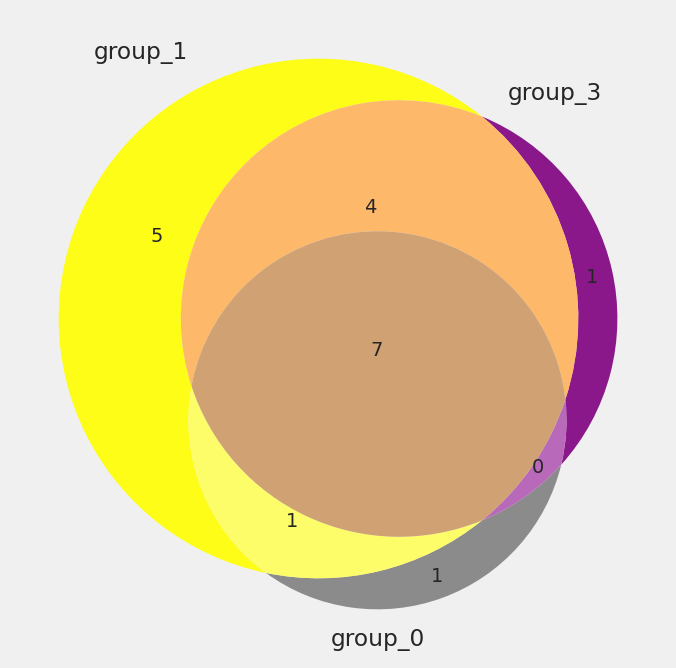

In [36]:
# Compare groups 1, 3 and 0
venn3([set(group_1), set(group_3), set(group_0)], set_colors=("yellow", "purple", "gray"), alpha=0.9, 
     set_labels = ('group_1', 'group_3', 'group_0'))
plt.show()

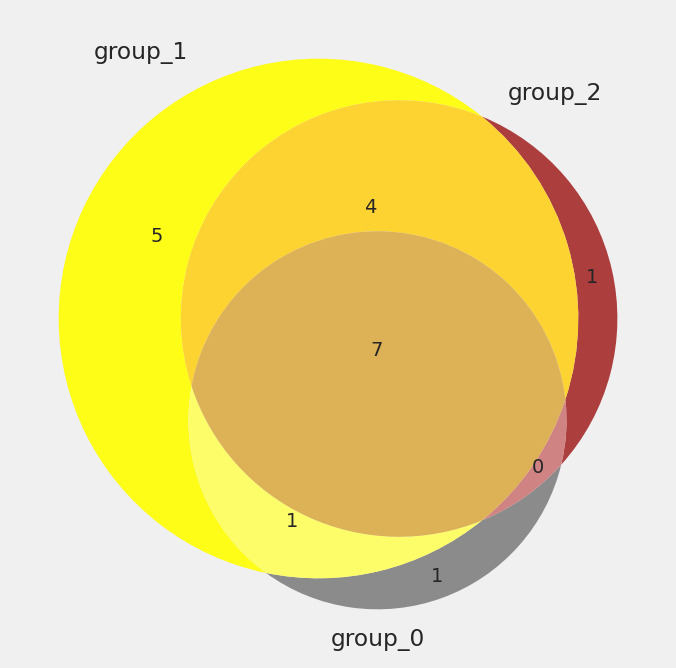

In [37]:
# # Compare groups 1, 2 and 0
venn3([set(group_1), set(group_2), set(group_0)], set_colors=("yellow", "brown", "gray"), alpha=0.9, 
     set_labels = ('group_1', 'group_2', 'group_0'))
plt.show()

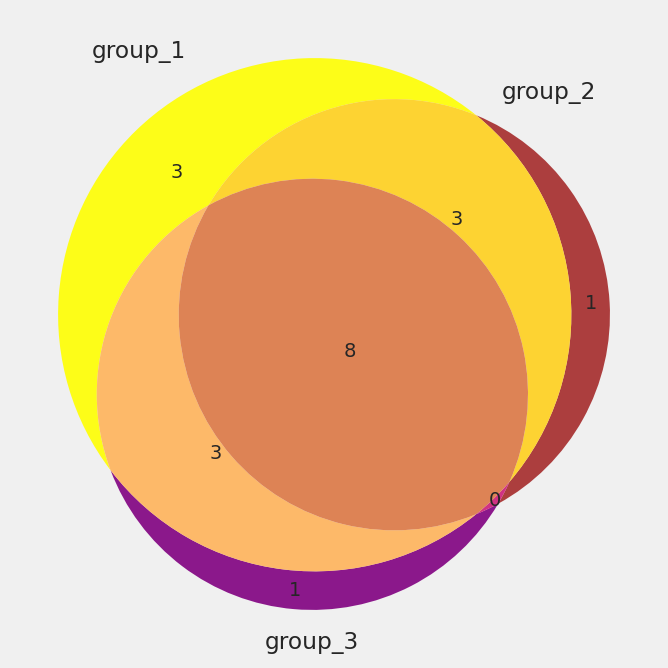

In [38]:
# Compare groups 1, 3 and 2
venn3([set(group_1), set(group_2), set(group_3)], set_colors=("yellow", "brown", "purple"), alpha=0.9, 
     set_labels = ('group_1', 'group_2', 'group_3'))
plt.show()

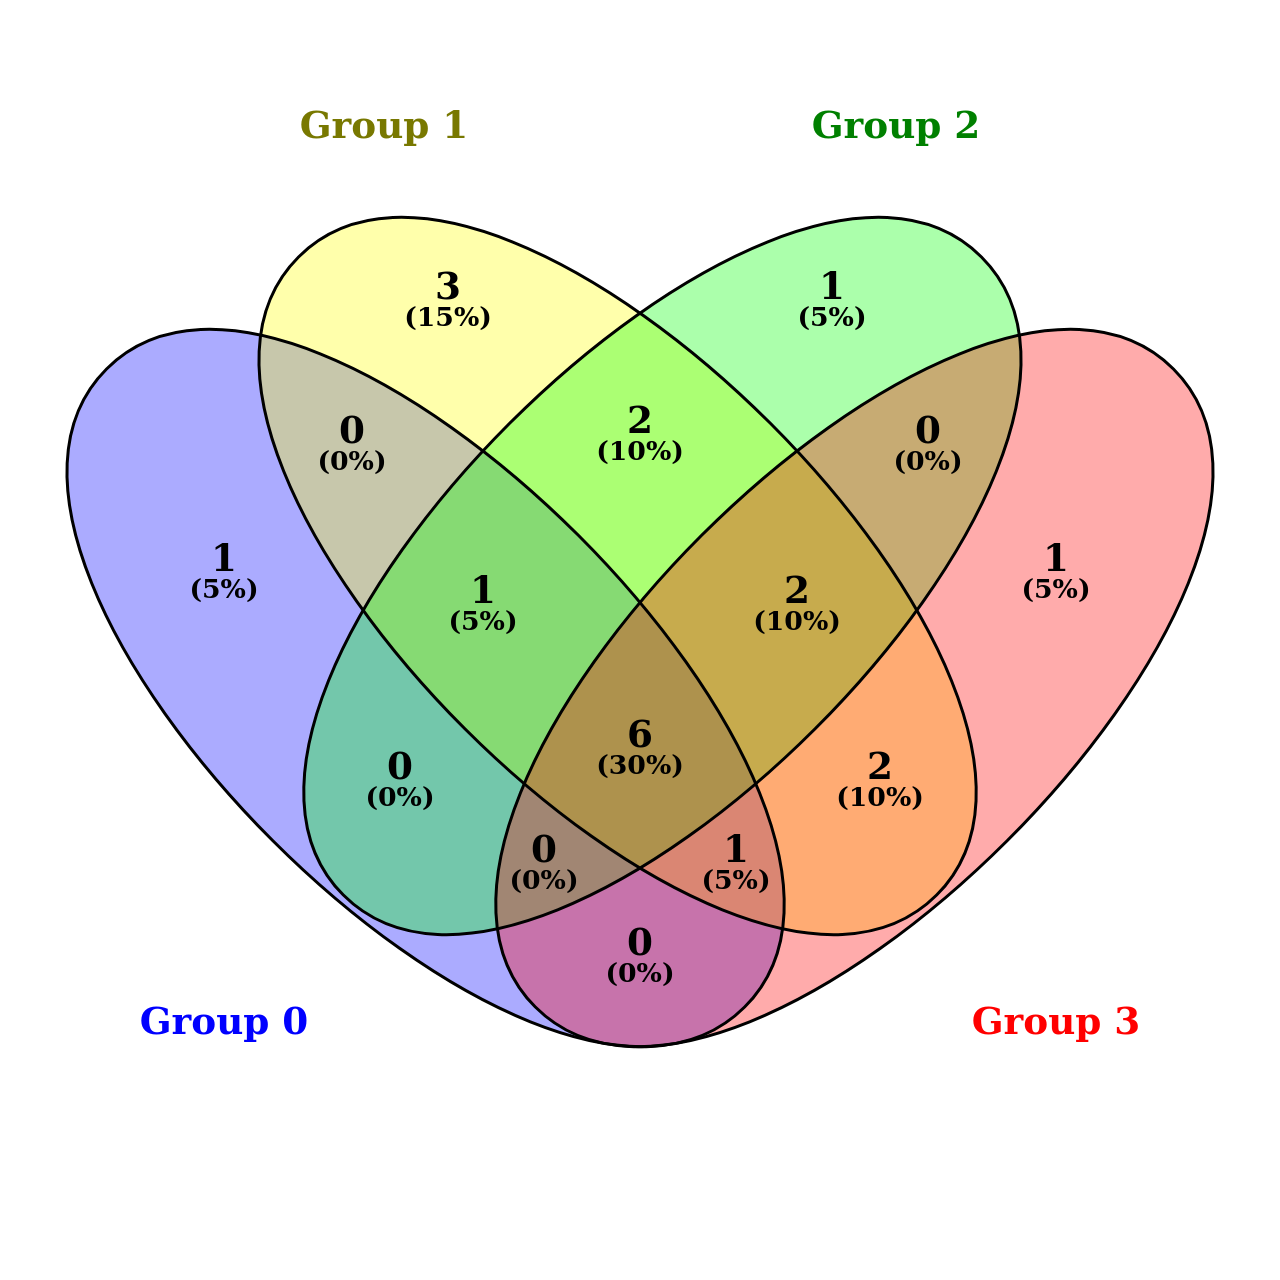

In [44]:
#Open Figure 2. Characteristic of the varieties by morphological features.
from PIL import Image
myImage = Image.open('venny1.png')
display(myImage)

All four groups have 6 common features, the group "1" has 5 individual features while other group have by 1 per group. 

## Conclusion

Ancient varieties and local forms of L. Usitatissimum are adapted to certain growing conditions, and could serve as the main sources of genetic diversity. 

### Literature

    Cullis, C.A. DNA sequence organization in the flax genome / C.A. Cullis // Biochim. Biophys. Acta. – 1981. – Т. 652, № 1. – С. 1-15.
    
    Durrant, A. An unstable gene in flax / A. Durrant, D.B. Nicholas // Heredity. – 1970. – Т. 25 – С. 513.
    
    Bickel C., Lukacs, Cullis C. The loci controlling plasticity in flax // Res. Rep. Biol- 2012. - P. -1.
    
    Oliveros, J.C. (2007-2015) Venny. An interactive tool for comparing lists with Venn's diagrams. https://bioinfogp.cnb.csic.es/tools/venny/index.html
    
    Pedregosa Scikit-learn: Machine Learning in Python / Pedregosa et al.// JMLR. - 2011. - Vol. 12. - P. 2825-2830.
    
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
    
    Virtanen, P. SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python / Virtanen, P, Gommers R., Travis E. Oliphant et al. // Nature Methods. - 2020. - Vol. 17, iss.3. - P. 261-272. https://doi.org/10.1038/s41592-019-0686-2 
    
    
    https://matplotlib.org/stable/index.html
    